In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#load the shampoo sales dataset

data = pd.read_csv("shampoo.xls", usecols=[1], names=["Sales"], header=0)

#load the dataset containing monthly shampoo sales data.

#selects only the sales column.

#Assign a column "Sales".

In [3]:
data

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3
5,168.5
6,231.8
7,224.5
8,192.8
9,122.9


In [4]:
#convert to time series format
data.index = pd.date_range(start="1901-01", periods=len(data), freq="M")

#converts the dataset into a time series format with a monthly frequency

In [5]:
data

,Sales
1901-01-31,266.0
1901-02-28,145.9
1901-03-31,183.1
1901-04-30,119.3
1901-05-31,180.3
1901-06-30,168.5
1901-07-31,231.8
1901-08-31,224.5
1901-09-30,192.8
1901-10-31,122.9


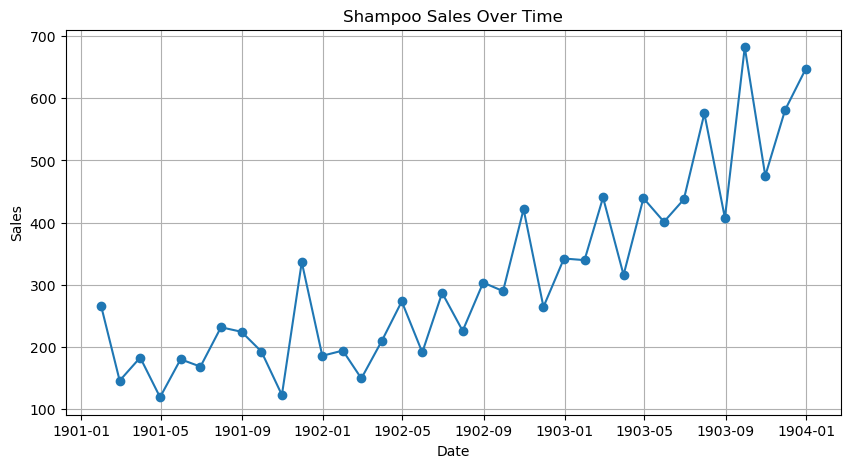

In [7]:
#visualise the data
plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-')
plt.title("Shampoo Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

#this plot helps identify trends, seasonility and patterns in the dataset.

In [8]:
#check the stationary using ADF test.
result = adfuller(data['Sales'])
print("ADF Statistics:", result[0])
print("p-value:", result[1])
if result[1]> 0.05:
    print("The data is non-stationary. Differencing is required.")
else:
    print("The data is stationary.")

ADF Statistics: 3.0601420836411797
p-value: 1.0
The data is non-stationary. Differencing is required.


In [9]:
# Differencing to make data stationary
data_diff = data.diff().dropna()

In [ ]:
#PLOT 